# 2 - (2) Growth rate of U.S. quarterly real GNP

Data: `dgnp82.txt` / `q-gnp4791.txt`

Page 44, 49

## 2-(2)-1. Page 44 Example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

# Load data
gnp = pd.read_csv('dgnp82.txt', delim_whitespace=True,names=['gnp'])
gnp

,gnp
0,0.00632
1,0.00366
2,0.01202
3,0.00627
4,0.01761
...,...
171,0.00420
172,0.00108
173,0.00358
174,-0.00399


In [2]:
# Create a time series with a frequency of 4 and starting at 1947, quarter 2
gnp.index = pd.date_range(start='1947-04-01', periods=len(gnp), freq='Q')
gnp

,gnp
1947-06-30,0.00632
1947-09-30,0.00366
1947-12-31,0.01202
1948-03-31,0.00627
1948-06-30,0.01761
...,...
1990-03-31,0.00420
1990-06-30,0.00108
1990-09-30,0.00358
1990-12-31,-0.00399


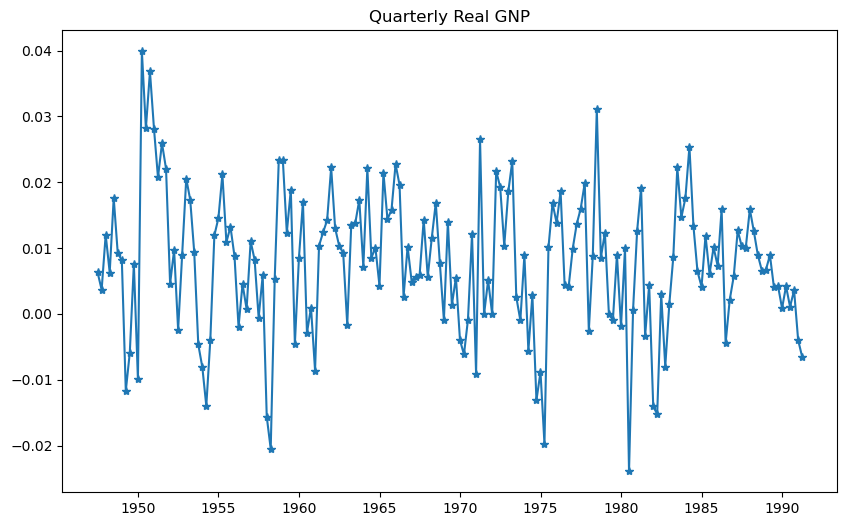

In [3]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(gnp, marker='*', linestyle='-')
plt.title('Quarterly Real GNP')
plt.show()

In [4]:
# Fit an autoregressive model and find the optimal order based on AIC
m1 = AutoReg(gnp, lags=3, old_names=False).fit()  # Example with lag 3, adjust as necessary
print("Optimal AR order:", m1.model.ar_lags)

Optimal AR order: [1, 2, 3]


In [5]:
# Estimate an ARIMA model
m2 = ARIMA(gnp, order=(3,0,0)).fit()
# Print the model summary
print(m2.summary())

                               SARIMAX Results                                
Dep. Variable:                    gnp   No. Observations:                  176
Model:                 ARIMA(3, 0, 0)   Log Likelihood                 565.842
Date:                Thu, 28 Dec 2023   AIC                          -1121.685
Time:                        10:26:30   BIC                          -1105.832
Sample:                    06-30-1947   HQIC                         -1115.255
                         - 03-31-1991                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0077      0.001      6.176      0.000       0.005       0.010
ar.L1          0.3488      0.071      4.910      0.000       0.210       0.488
ar.L2          0.1784      0.073      2.452      0.0

In [27]:
# Intercept calculation (assuming 'intercept' in R corresponds to 'const' in Python's ARIMA)
const_calculation = (1 - sum(m2.arparams)) * m2.params['const']
print("Constant term calculation:", f'{const_calculation:.6f}')

Constant term calculation: 0.004719


In [28]:
# Residual standard error
residual_standard_error = np.sqrt(np.mean(m2.resid**2))
print("Residual standard error:", f'{residual_standard_error:.6f}')

Residual standard error: 0.009710


In [11]:
# Characteristic equation
p1 = np.array([1, -m2.arparams[0], -m2.arparams[1], -m2.arparams[2]])
p1

array([ 1.        , -0.34878633, -0.17842654,  0.14196452])

In [19]:
# Find solutions to the characteristic equation (roots)
roots = np.roots(p1)
print("Roots:", roots)

Roots: [-0.51982566+0.j          0.434306  +0.29065196j  0.434306  -0.29065196j]


In [18]:
# Compute the absolute values of the solutions
absolute_roots = np.abs(roots)
print("Absolute values of the roots:", absolute_roots)

Absolute values of the roots: [0.51982566 0.52258996 0.52258996]


In [17]:
# Compute average length of business cycles
k = 2 * np.pi / np.arccos(1.590253 / 1.913308)  # Adjust values as needed
print("Average length of business cycles:", k)

Average length of business cycles: 10.656383699340376


## 2-(2)-2. Page 49 Example

In [32]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import numpy as np

# Load the data
# same as q-gnp4791.txt
gnp = pd.read_csv('dgnp82.txt', delim_whitespace=True,names=['gnp'])
gnp

,gnp
0,0.00632
1,0.00366
2,0.01202
3,0.00627
4,0.01761
...,...
171,0.00420
172,0.00108
173,0.00358
174,-0.00399


In [37]:
# Fit an AR model using MLE
# The maxlag parameter might need to be adjusted
model = AutoReg(gnp, lags=10, old_names=False).fit()

# Retrieve the AIC and the order of the model
aic_value = model.aic
model_order = model.ar_lags[-1] if model.ar_lags else 0 # Number of lags used in the model

print("AIC:", aic_value)
print("Order of the model:", model_order)

AIC: -1046.1428454223935
Order of the model: 10
